Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/philosopher/'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [4]:
print("Data:")
print(df.shape)
df.head(15)

Data:
(11, 5)


,Iterations,N,M,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,10,50,10000,302.732069,215.508874
1,10,100,10000,670.621045,381.767745
2,10,500,10000,4656.199843,1763.196442
3,10,1000,10000,10236.489985,3665.567980
4,10,5000,10000,71204.122869,21836.116964
5,10,10000,50,690.810834,293.134649
6,10,10000,100,1446.929862,738.888231
7,10,10000,500,7420.102011,3423.942374
8,10,10000,1000,15109.840676,6838.610566
9,10,10000,5000,73825.208904,30916.009136


Add Custom Column for N and R

In [5]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

In [6]:
# Combine N (Number of Actors) and R (Number of Rounds) into a new column for x-axis label
df['N_M'] = "(N=" + df['N'].apply(format_number_str) + ", M=" + df['M'].apply(format_number_str) + ")"
df.head(15)

,Iterations,N,M,Erlang Energy Consumption(J),Scala Energy Consumption(J),N_M
0,10,50,10000,302.732069,215.508874,"(N=50, M=10K)"
1,10,100,10000,670.621045,381.767745,"(N=100, M=10K)"
2,10,500,10000,4656.199843,1763.196442,"(N=500, M=10K)"
3,10,1000,10000,10236.489985,3665.567980,"(N=1K, M=10K)"
4,10,5000,10000,71204.122869,21836.116964,"(N=5K, M=10K)"
5,10,10000,50,690.810834,293.134649,"(N=10K, M=50)"
6,10,10000,100,1446.929862,738.888231,"(N=10K, M=100)"
7,10,10000,500,7420.102011,3423.942374,"(N=10K, M=500)"
8,10,10000,1000,15109.840676,6838.610566,"(N=10K, M=1K)"
9,10,10000,5000,73825.208904,30916.009136,"(N=10K, M=5K)"


Visualize the Data

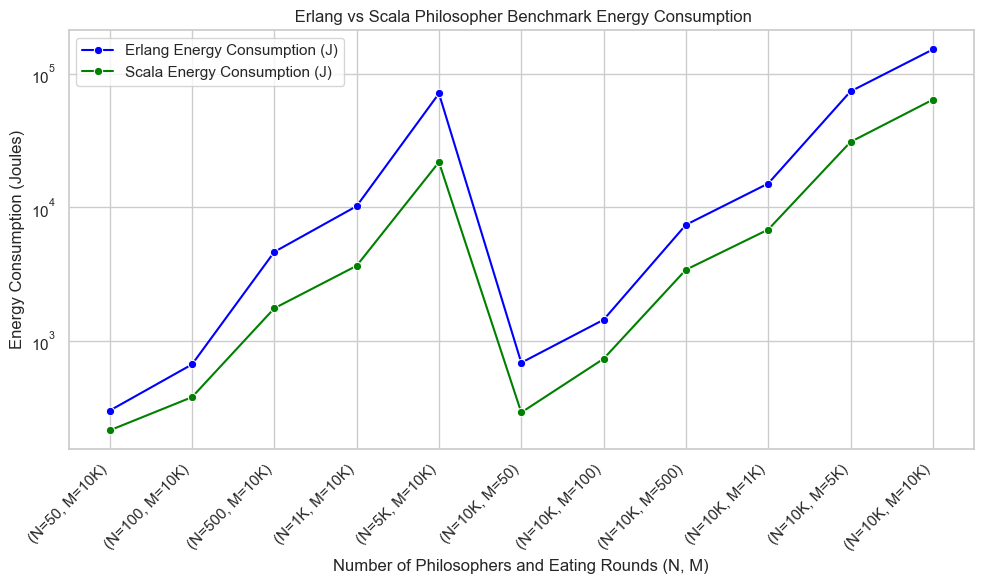

In [7]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="N_M", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="N_M", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Philosophers and Eating Rounds (N, M)")
plt.ylabel("Energy Consumption (Joules)")
plt.title(" Erlang vs Scala Philosopher Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# # Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
